# BBC News Classification Project

There exists a large amount of information being stored in the electronic format. With such data it has
become a necessity of such means that could interpret and analyse such data and extract such facts that could
help in decision-making.<br>
News is easily accessible via content providers such as online news services. A huge amount of information exists in form of text in various diverse areas whose analysis can be beneficial in several areas. Classification is quite a challenging field in text mining as it requires prepossessing steps to convert unstructured data to structured information. With the increase in the number of news it has got difficult for users to access news of his interest which makes it a necessity to categories news so that it could be easily accessed. Categorization refers to grouping that allows easier navigation among articles. Internet news needs to be divided into categories

### The Dataset
Text documents are one of the richest sources of data for businesses.

We’ll use a public dataset from the BBC comprised of 2225 articles, each labeled under one of 5 categories: business, entertainment, politics, sport or tech.

The dataset is broken into 1490 records for training and 735 for testing. The goal will be to build a system that can accurately classify previously unseen news articles into the right category.


1. **Summary of the project**: We are classifying BBC news articles into five categories using natural Language Processing and Machine Learning. The five news topics are: Politics, Entertainment, Sports, Technology, and Business. The goal of this project is to create a text classifier that will streamline the process of categorizing news publications. 
<br><br>
2. **Summary of the data**: The dataset consists of 2225 news articles extracted from the BBC website between 2004 and 2005. It was published open source by Insight Resources and was collected by UC Davis for research. The class distribution is as follows:
```
business: 510
entertainment: 386
politics: 417 
sports: 511
technology: 401 
```
The dataset available on Kaggle https://www.kaggle.com/c/learn-ai-bbc/data

In [1]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import os

from sklearn.feature_extraction.text import TfidfVectorizer

### Import Training dataset

In [3]:
#Import the training dataset
df_train = pd.read_csv('/content/drive/My Drive/AI_Project/NLP/BBC-News-Classification/Data/BBC News Train.csv')

In [4]:
#Return the first 5 rows.
df_train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


Encode the object as an enumerated type or categorical variable.
This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values. 

In [5]:
#Encode categorical variable.
df_train['category_id'] = df_train['Category'].factorize()[0]

A groupby operation involves some combination of splitting the object, applying a function, and combining the results.

In [6]:
#Combining the results after factorized
df_train.groupby('Category').category_id.count()

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: category_id, dtype: int64

Graph the categorical data 

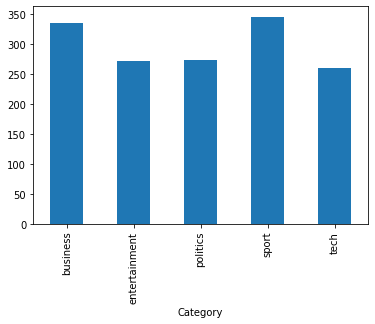

In [7]:
#visualization of the categorical data
df_train.groupby("Category").category_id.count().plot.bar(ylim=0)

In [9]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_train.Text).toarray()
labels = df_train.category_id

In [10]:
category_to_id = {'business':0, 'tech':1, 'politics':2, 'sport':3, 'entertainment':4}
id_to_category = {0: 'business', 1: 'tech', 2: 'politics', 3: 'sport', 4: 'entertainment'}

In [11]:
# Use chi-square analysis to find corelation between features (importantce of words) and labels(news category) 
from sklearn.feature_selection import chi2

N = 3  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for Category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)                   # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(Category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat

# 'business':
  . Most correlated unigrams:
       . growth
       . bank
       . shares
  . Most correlated bigrams:
       . stock market
       . economic growth
       . analysts said
# 'entertainment':
  . Most correlated unigrams:
       . singer
       . actor
       . film
  . Most correlated bigrams:
       . won best
       . los angeles
       . box office
# 'politics':
  . Most correlated unigrams:
       . blair
       . election
       . labour
  . Most correlated bigrams:
       . prime minister
       . tony blair
       . mr blair
# 'sport':
  . Most correlated unigrams:
       . match
       . coach
       . cup
  . Most correlated bigrams:
       . grand slam
       . champions league
       . australian open
# 'tech':
  . Most correlated unigrams:
       . technology
       . software
       . users
  . Most correlated bigrams:
       . anti virus
       . mobile phones
       . mobile phone
